# Обучение нейросетей в PyTorch

### Гиперпараметры

In [ ]:
N_NEURONS1 = 100
N_NEURONS2 = 100
N_CLASSES = 10

BATCH_SIZE = 64
LEARNING_RATE = 0.0001
NUM_EPOCHS = 10

DEVICE = "cuda"

### Загрузка библиотек

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### Подготовка данных

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
X[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

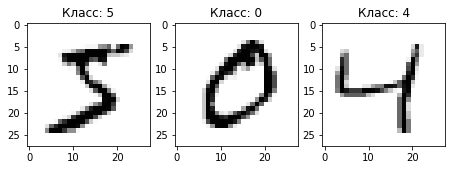

In [ ]:
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap="Greys")
    plt.title("Класс: %d"%y[i])

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
train_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), 
                                            torch.from_numpy(y_train).long())
train_loader = torch.utils.data.DataLoader(train_dset, 
                                            batch_size=BATCH_SIZE)

In [ ]:
test_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), 
                                           torch.from_numpy(y_train).long())
test_loader = torch.utils.data.DataLoader(test_dset, 
                                            batch_size=BATCH_SIZE)

### Сборка нейросети

In [ ]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], N_NEURONS1)
        self.fc2 = nn.Linear(N_NEURONS1, N_NEURONS2)
        self.fc3 = nn.Linear(N_NEURONS2, N_CLASSES)

    def forward(self, x):
        z1 = F.relu(self.fc1(x))
        z2 = F.relu(self.fc2(z1))
        z3 = self.fc3(z2)
        return z3

In [ ]:
net = FCN()
mini_batch = torch.from_numpy(X[:3]).float()
net(mini_batch)

tensor([[ -4.6646,  -0.2510,   1.1177,   6.2716,  -2.0789,  -7.7765,   5.1392,
           2.9302,   7.5651,  -3.1593],
        [ -3.1669,   0.9321,  -4.3494,  12.9912,   0.9099, -22.3626,   6.5179,
          -1.4272,  12.8531,  -2.5918],
        [ -6.2784,  -6.0813,   4.0047,  17.1226,  -3.9693,  -5.7328,  -4.1597,
          -3.9318,  16.7044,  -1.1909]], grad_fn=<AddmmBackward>)

Альтернативный упрощенный вариант для последовательных архитектур:

In [ ]:
net = nn.Sequential(nn.Linear(X.shape[1], N_NEURONS1),\
                    nn.ReLU(),
                    nn.Linear(N_NEURONS1, N_NEURONS2),
                    nn.ReLU(),
                    nn.Linear(N_NEURONS2, N_CLASSES))

Перенос нейросети на GPU:

In [ ]:
net.to(DEVICE)

FCN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

Все параметры нейросети:

In [ ]:
list(net.parameters())

### Обучение нейросети

Функция потерь:

In [ ]:
criterion = nn.CrossEntropyLoss() # softmax и кросс-энтропия вместе

Алгоритм оптимизации (оптимизатор):

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)

Обучение:

In [ ]:
total_step = len(train_loader)
for epoch in range(NUM_EPOCHS): # цикл по эпохам обучения
    for i, (images, labels) in enumerate(train_loader): # цикл по мини-батчам
        # Перенос обоих тензоров на GPU
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        
        # Проход вперед
        outputs = net(images)
        loss = criterion(outputs, labels)
        
        # Проход назад
        optimizer.zero_grad()
        loss.backward()

        # Обновление параметров нейросети
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, NUM_EPOCHS, i+1, total_step, loss.item()))

Epoch [1/10], Step [200/938], Loss: 0.6098
Epoch [1/10], Step [400/938], Loss: 0.5018
Epoch [1/10], Step [600/938], Loss: 0.3528
Epoch [1/10], Step [800/938], Loss: 0.3585
Epoch [2/10], Step [200/938], Loss: 0.3178
Epoch [2/10], Step [400/938], Loss: 0.2869
Epoch [2/10], Step [600/938], Loss: 0.1995
Epoch [2/10], Step [800/938], Loss: 0.1846
Epoch [3/10], Step [200/938], Loss: 0.1665
Epoch [3/10], Step [400/938], Loss: 0.2249
Epoch [3/10], Step [600/938], Loss: 0.1560
Epoch [3/10], Step [800/938], Loss: 0.0990
Epoch [4/10], Step [200/938], Loss: 0.0993
Epoch [4/10], Step [400/938], Loss: 0.1787
Epoch [4/10], Step [600/938], Loss: 0.0844
Epoch [4/10], Step [800/938], Loss: 0.0736
Epoch [5/10], Step [200/938], Loss: 0.0739
Epoch [5/10], Step [400/938], Loss: 0.1400
Epoch [5/10], Step [600/938], Loss: 0.0726
Epoch [5/10], Step [800/938], Loss: 0.0385
Epoch [6/10], Step [200/938], Loss: 0.0518
Epoch [6/10], Step [400/938], Loss: 0.1293
Epoch [6/10], Step [600/938], Loss: 0.0750
Epoch [6/10

In [ ]:
net.eval()  # режим тестирования (потребуется в следующих неделях)
with torch.no_grad(): # отключение построения графа вычислений (не нужен на этапе тестирования)
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = net(images)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

    print('Test accuracy:', 100 * correct / total)

Test accuracy: 99.08166666666666


### Более низкоуровневый вариант сборки нейронной сети

In [ ]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.W1 = nn.Parameter(torch.randn(N_NEURONS1, X.shape[1]))
        self.b1 = nn.Parameter(torch.randn(N_NEURONS1))
        self.W2 = nn.Parameter(torch.randn(N_CLASSES, N_NEURONS1))
        self.b2 = nn.Parameter(torch.randn(N_CLASSES))

    def forward(self, x):
        z1 = torch.matmul(self.W1, x.transpose(1, 0)) + self.b1[:, None]
        z2 = torch.maximum(z1, torch.zeros_like(z1))
        z3 = torch.matmul(self.W2, z2) + self.b2[:, None]
        return z3.transpose(1, 0)

In [ ]:
net = FCN()
mini_batch = torch.from_numpy(X[:3]).float()
net(mini_batch)

tensor([[-29472.6992, -23777.8438,   3021.0781,   9473.9512,   6535.2485,
          -4487.4683, -17709.0488,  13792.2959,  -9899.4424,  21554.3848],
        [-13596.3359, -14096.9697,  14345.2178,  -4024.4700,   2354.2158,
          18795.4180, -27506.9238,   3350.9380, -18691.1543,  16751.3301],
        [  9112.7285,   4934.8525,   7722.8164,  -1423.6840,  27005.1953,
            217.1530, -18411.6855,   1088.4219, -12170.9004,   9250.8652]],
       grad_fn=<TransposeBackward0>)